In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.1 Чтение данных из файлов

In [112]:
df_p = pd.read_csv('data/Products.csv', sep=';')
df_c = pd.read_csv('data/Customers.csv', sep=';')
df_o = pd.read_csv('data/Orders.csv', sep=';')
df_od = pd.read_csv('data/Order_details.csv', sep=';')
df_e = pd.read_excel('data/Employees.xlsx')

In [113]:
df_od.shape

(2155, 5)

In [114]:
df_r = pd.read_excel('data/Employees.xlsx', sheet_name='Лист3')
df_r.head()

,Возраст
0,44
1,35
2,31
3,38
4,32


In [115]:
df_r.describe().loc[['mean', 'std', '50%']]

,Возраст
mean,42.750000
std,12.373228
50%,41.500000


In [116]:
df_c.loc[24, 'ContactName']

'Peter Franken'

In [117]:
df_od.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount
0,10248,11,14.0,12,0.0
1,10248,42,9.8,10,0.0
2,10248,72,34.8,5,0.0
3,10249,14,18.6,9,0.0
4,10249,51,42.4,40,0.0


In [118]:
df_c[df_c['ContactTitle'] == 'Owner'].shape[0]

17

In [119]:
df_o['OrderDate'] = df_o['OrderDate'].astype('datetime64[ns]')

In [120]:
(df_o['OrderDate'] > '1997-07-05').sum()

488

In [121]:
(df_o['Freight'] <= 10.98).sum()

184

In [122]:
df_c['ContactTitle'].isin(['Sales Representative','Sales Agent','Sales Associate','Sales Manager','Assistant Sales Agent', 'Assistant Sales Representative']).sum()

43

In [123]:
((df_p['UnitPrice'] >= 18) & (df_p['UnitPrice'] <= 22)).sum()

16

In [124]:
((df_o['Freight'] > 500) & (df_o['OrderDate'].dt.year == 1997)).sum()

5

In [125]:
((df_o['Freight'] > 500) | (df_o['OrderDate'].dt.year == 1997)).sum()

416

In [126]:
df_c['ContactName'].apply(lambda x: x.startswith('A')).sum()
df_c['ContactName'].str.startswith('A').sum()

# 102 μs ± 3.56 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
# 143 μs ± 711 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

10

In [127]:
df_c['Phone'].apply(lambda x: '5555' in x).sum()

2

In [128]:
df_o[df_o['OrderDate'].dt.year == 1997].sort_values(by=['CustomerID', 'Freight'], ascending=[True, True]).loc[df_o['CustomerID'] == 'ANTON']

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
429,10677,ANTON,1,1997-09-22,1997-10-20 00:00:00.000,1997-09-26 00:00:00.000,4.03
287,10535,ANTON,4,1997-05-13,1997-06-10 00:00:00.000,1997-05-21 00:00:00.000,15.64
434,10682,ANTON,3,1997-09-25,1997-10-23 00:00:00.000,1997-10-01 00:00:00.000,36.13
259,10507,ANTON,7,1997-04-15,1997-05-13 00:00:00.000,1997-04-22 00:00:00.000,47.45
325,10573,ANTON,7,1997-06-19,1997-07-17 00:00:00.000,1997-06-20 00:00:00.000,84.84


In [129]:
df_c[df_c['ContactTitle'].isin(['Owner', 'Sales Representative'])].count()

CustomerID      34
ContactName     34
ContactTitle    34
Phone           34
Address         34
dtype: int64

In [130]:
df_o['Freight'].max() - df_o['Freight'].min()

1007.62

In [131]:
df_o[df_o['OrderDate'] == '26-02-1998']['Freight'].sum()

776.27

In [132]:
df_c['ContactTitle'].value_counts()

ContactTitle
Sales Representative              17
Owner                             17
Marketing Manager                 12
Sales Manager                     11
Accounting Manager                10
Sales Associate                    7
Marketing Assistant                6
Sales Agent                        5
Order Administrator                2
Assistant Sales Agent              2
Assistant Sales Representative     1
Owner/Marketing Assistant          1
Name: count, dtype: int64

In [133]:
from tabulate import tabulate
df_n = df_c.groupby('ContactTitle').CustomerID.count().reset_index()
print(tabulate(df_n, headers='keys', tablefmt='psql'))

+----+--------------------------------+--------------+
|    | ContactTitle                   |   CustomerID |
|----+--------------------------------+--------------|
|  0 | Accounting Manager             |           10 |
|  1 | Assistant Sales Agent          |            2 |
|  2 | Assistant Sales Representative |            1 |
|  3 | Marketing Assistant            |            6 |
|  4 | Marketing Manager              |           12 |
|  5 | Order Administrator            |            2 |
|  6 | Owner                          |           17 |
|  7 | Owner/Marketing Assistant      |            1 |
|  8 | Sales Agent                    |            5 |
|  9 | Sales Associate                |            7 |
| 10 | Sales Manager                  |           11 |
| 11 | Sales Representative           |           17 |
+----+--------------------------------+--------------+


In [134]:
df_o[['EmployeeID', 'OrderID']].groupby('EmployeeID').count().sort_values('OrderID', ascending=True).head()

,OrderID
EmployeeID,
5,42
9,43
6,67
7,72
2,96


In [135]:
df_o.groupby('EmployeeID')['OrderID'].count().idxmin()

5

In [136]:
df_o.groupby('OrderDate')['OrderID'].count().idxmax().strftime('%Y%m%d')

'19980226'

In [137]:
df_o.groupby(['EmployeeID', 'CustomerID'])['OrderID'].count().max()

6

In [138]:
df_od['Discount_fact'] = df_od['UnitPrice'] * df_od['Quantity'] * df_od['Discount']

In [139]:
df_od['Revenue'] = df_od['UnitPrice'] * df_od['Quantity'] - df_od['Discount_fact']

In [140]:
df_od.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,Discount_fact,Revenue
0,10248,11,14.0,12,0.0,0.0,168.0
1,10248,42,9.8,10,0.0,0.0,98.0
2,10248,72,34.8,5,0.0,0.0,174.0
3,10249,14,18.6,9,0.0,0.0,167.4
4,10249,51,42.4,40,0.0,0.0,1696.0


In [141]:
df_od.sort_values('Revenue', ascending=False)

,OrderID,ProductID,UnitPrice,Quantity,Discount,Discount_fact,Revenue
1893,10981,38,263.50,60,0.00,0.00,15810.00
1620,10865,38,263.50,60,0.05,790.50,15019.50
449,10417,38,210.80,50,0.00,0.00,10540.00
1678,10889,38,263.50,40,0.00,0.00,10540.00
1698,10897,29,123.79,80,0.00,0.00,9903.20
...,...,...,...,...,...,...,...
1401,10782,31,12.50,1,0.00,0.00,12.50
460,10420,13,4.80,2,0.10,0.96,8.64
1580,10850,33,2.50,4,0.15,1.50,8.50
86,10281,19,7.30,1,0.00,0.00,7.30


In [142]:
df_od[df_od['Revenue'] == df_od['Revenue'].max()]['OrderID']

1893    10981
Name: OrderID, dtype: int64

In [143]:
# Как зовут сотрудника, который оформил больше всего заказов за все время?

temp_df = df_o.merge(df_e)
temp_df.groupby(['EmployeeID', 'FirstName', 'LastName']).OrderID.count().sort_values(ascending=False).reset_index().head(1)

,EmployeeID,FirstName,LastName,OrderID
0,4,Margaret,Peacock,156


In [144]:
# Как зовут клиента, который принес самую высокую чистую выручку за все время?
display(df_c.head(1), df_o.head(1), df_od.head(1))

,CustomerID,ContactName,ContactTitle,Phone,Address
0,ALFKI,Maria Anders,Sales Representative,030-0074321,Obere Str. 57


,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight
0,10248,VINET,5,1996-07-04,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38


,OrderID,ProductID,UnitPrice,Quantity,Discount,Discount_fact,Revenue
0,10248,11,14.0,12,0.0,0.0,168.0


In [145]:
temp_df = pd.merge(df_c, df_o, on='CustomerID').merge(df_od, on='OrderID')

In [146]:
temp_df[['ContactName', 'Revenue']].groupby('ContactName').sum().sort_values(by='Revenue', ascending=False).reset_index().head(1)

,ContactName,Revenue
0,Horst Kloss,110277.305


In [147]:
# Какая категория товаров принесла самую высокую чистую выручку?
display(df_p.head(1), df_od.head(1))

,ProductID,ProductName,Product_Description,UnitPrice,CategoryID,CategoryName,Category_Description
0,1,Chai,10 boxes x 20 bags,18.0,1,Beverages,Soft drinks. coffees. teas. beers. and ales


,OrderID,ProductID,UnitPrice,Quantity,Discount,Discount_fact,Revenue
0,10248,11,14.0,12,0.0,0.0,168.0


In [148]:
temp_df = pd.merge(df_p, df_od, on='ProductID')
temp_df[['CategoryName', 'Revenue']].groupby('CategoryName').sum().sort_values(by='Revenue', ascending=False).reset_index().head(1)

,CategoryName,Revenue
0,Beverages,267868.18


In [149]:
# Какую чистую выручку принесла категория Confections?

temp_df.loc[temp_df['CategoryName'] == 'Confections', 'Revenue'].sum()

167357.225

In [150]:
# C помощью метода .concat() объедините должности сотрудников и должности клиентов. Сколько человек состоят в должности Sales Representative?

display(df_c.head(1), df_e.head(1))

,CustomerID,ContactName,ContactTitle,Phone,Address
0,ALFKI,Maria Anders,Sales Representative,030-0074321,Obere Str. 57


,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,HomePhone
0,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 - 20th Ave. E. Apt. 2A,(206) 555-9857


In [151]:
pd.concat([df_c['ContactTitle'], df_e['Title']]).value_counts()

Sales Representative              23
Owner                             17
Marketing Manager                 12
Sales Manager                     12
Accounting Manager                10
Sales Associate                    7
Marketing Assistant                6
Sales Agent                        5
Order Administrator                2
Assistant Sales Agent              2
Assistant Sales Representative     1
Owner/Marketing Assistant          1
Vice President, Sales              1
Inside Sales Coordinator           1
Name: count, dtype: int64

In [152]:
# В каком месяце было совершено рекордное количество заказов? Месяц запишите в формате 062022.

df_o['Month_Year'] = df_o['OrderDate'].dt.strftime('%m%Y')
df_o[['Month_Year', 'OrderID']].groupby('Month_Year').sum().idxmax()

OrderID    041998
dtype: object

In [153]:
# Сколько заказов было сделано на 43 неделе 1996 года?

df_o[(df_o['OrderDate'].dt.year == 1996) & (df_o['OrderDate'].dt.isocalendar().week == 43)].shape[0]

5

In [154]:
# Посчитайте рекордную чистую выручку, которую сделал один сотрудник в месяц?
display(df_o.head(1), df_od.head(1))

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight,Month_Year
0,10248,VINET,5,1996-07-04,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38,071996


,OrderID,ProductID,UnitPrice,Quantity,Discount,Discount_fact,Revenue
0,10248,11,14.0,12,0.0,0.0,168.0


In [155]:
df_o['Month_Year'] = df_o['OrderDate'].dt.strftime('%m-%Y')
temp_df = pd.merge(df_o, df_od, on='OrderID')[['Month_Year', 'EmployeeID', 'Revenue']]
temp_df.groupby(by=['Month_Year', 'EmployeeID']).agg({'Revenue': 'sum'}).max()

Revenue    30990.28
dtype: float64

In [156]:
# С помощью метода .pivot_table() постройте сводную таблицу, 
# в которой по вертикали будут годы, а по горизонтали кварталы. 
# Посчитайте количество заказов. Сколько заказов было оформлено в 1 квартале 1998 года?

df_o.head(1)

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight,Month_Year
0,10248,VINET,5,1996-07-04,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38,07-1996


In [157]:
df_o.pivot_table(index=df_o['OrderDate'].dt.quarter, 
                 columns=df_o['OrderDate'].dt.year,
                 values='OrderID',
                 aggfunc='count',
                 fill_value=0).rename_axis(None, axis=1).loc[1, 1998]

182

In [158]:
# Присоедините к датафрейму с сотрудниками df_e датафрейм df_sex. 
# Далее в разрезе пола посчитайте количество оформленных заказов. 
# На сколько представители одного пола оформили больше заказов, чем представители другого пола? 

df_sex = pd.DataFrame(data=zip(*[['Ms.', 'Dr.', 'Mrs.', 'Mr.'], ['female', 'male', 'female', 'male']]), 
                      columns=['TitleOfCourtesy', 'Sex'])
display(df_e.head(5), df_sex.head(5))

,EmployeeID,FirstName,LastName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,HomePhone
0,1,Nancy,Davolio,Sales Representative,Ms.,1948-12-08 00:00:00.000,1992-05-01 00:00:00.000,507 - 20th Ave. E. Apt. 2A,(206) 555-9857
1,2,Andrew,Fuller,"Vice President, Sales",Dr.,1952-02-19 00:00:00.000,1992-08-14 00:00:00.000,908 W. Capital Way,(206) 555-9482
2,3,Janet,Leverling,Sales Representative,Ms.,1963-08-30 00:00:00.000,1992-04-01 00:00:00.000,722 Moss Bay Blvd.,(206) 555-3412
3,4,Margaret,Peacock,Sales Representative,Mrs.,1937-09-19 00:00:00.000,1993-05-03 00:00:00.000,4110 Old Redmond Rd.,(206) 555-8122
4,5,Steven,Buchanan,Sales Manager,Mr.,1955-03-04 00:00:00.000,1993-10-17 00:00:00.000,14 Garrett Hill,(71) 555-4848


,TitleOfCourtesy,Sex
0,Ms.,female
1,Dr.,male
2,Mrs.,female
3,Mr.,male


In [159]:
pd.merge(df_e, df_sex, on='TitleOfCourtesy').merge(df_o, on='EmployeeID')[['Sex', 'OrderID']].groupby('Sex').count().diff()

,OrderID
Sex,
female,NaN
male,-276.0


In [160]:
# Посчитайте для каждого заказа чистую выручку. 
# Затем помощью метода .cut() разбейте столбец с чистой выручкой на 5 бинов. 
# Добавьте столбец с бинами в датафрейм. 
# Далее в разрезе бинов посчитайте количество заказов. 
# Сопоставьте бин и количество заказов в бине.

df_od.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,Discount_fact,Revenue
0,10248,11,14.0,12,0.0,0.0,168.0
1,10248,42,9.8,10,0.0,0.0,98.0
2,10248,72,34.8,5,0.0,0.0,174.0
3,10249,14,18.6,9,0.0,0.0,167.4
4,10249,51,42.4,40,0.0,0.0,1696.0


In [161]:
temp_df = df_od[['OrderID', 'Revenue']].groupby('OrderID').agg({'Revenue': 'sum'}).reset_index()
temp_df['bins_cut'] = pd.cut(temp_df['Revenue'], 5)

In [162]:
temp_df.groupby('bins_cut', observed=False).count()

,OrderID,Revenue
bins_cut,,
"(-3.875, 3287.5]",750,750
"(3287.5, 6562.5]",60,60
"(6562.5, 9837.5]",9,9
"(9837.5, 13112.5]",9,9
"(13112.5, 16387.5]",2,2


In [163]:
temp_df['bins_cut'] = pd.qcut(temp_df['Revenue'], 5)
temp_df.groupby('bins_cut', observed=False).count()

,OrderID,Revenue
bins_cut,,
"(12.499, 365.432]",166,166
"(365.432, 721.86]",166,166
"(721.86, 1335.78]",166,166
"(1335.78, 2122.976]",166,166
"(2122.976, 16387.5]",166,166


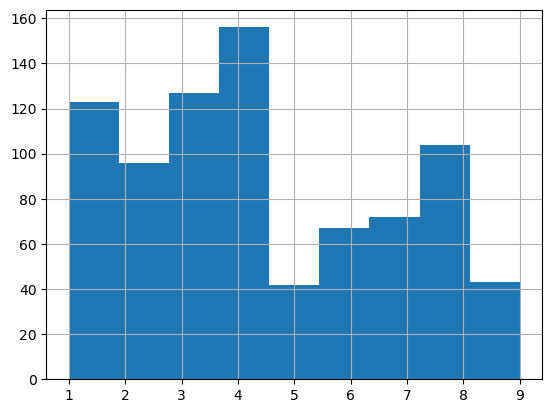

In [164]:
# Постройте гистограмму для столбца EmployeeID. 
# Сотрудник с каким ID оформил больше всего заказов за все время? Введите EmployeeID.

plt.hist(data=df_o, x='EmployeeID', bins=df_o['EmployeeID'].nunique())
plt.grid()
plt.show();

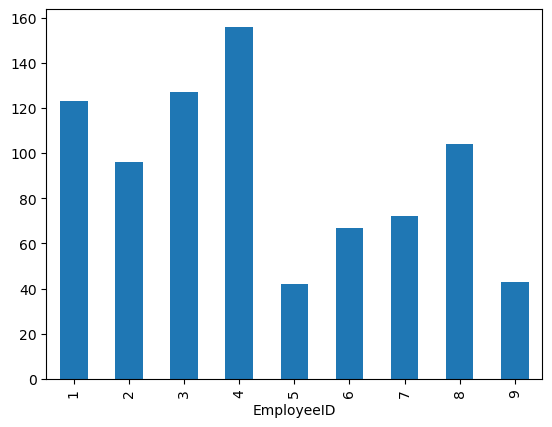

In [165]:
df_o.groupby('EmployeeID')['OrderID'].count().plot(kind='bar');

In [166]:
# Посчитайте фактическую скидку и чистую выручку для каждой строки в датафрейме df_od. 
# Затем сгруппируйте чистую выручку и фактическую скидку для каждого заказа. 
# Далее постройте scatter plot, где по вертикали расположится фактическая скидка, 
# а по горизонтали - чистая выручка. Выберите верное утверждение. 

df_od.head()

,OrderID,ProductID,UnitPrice,Quantity,Discount,Discount_fact,Revenue
0,10248,11,14.0,12,0.0,0.0,168.0
1,10248,42,9.8,10,0.0,0.0,98.0
2,10248,72,34.8,5,0.0,0.0,174.0
3,10249,14,18.6,9,0.0,0.0,167.4
4,10249,51,42.4,40,0.0,0.0,1696.0


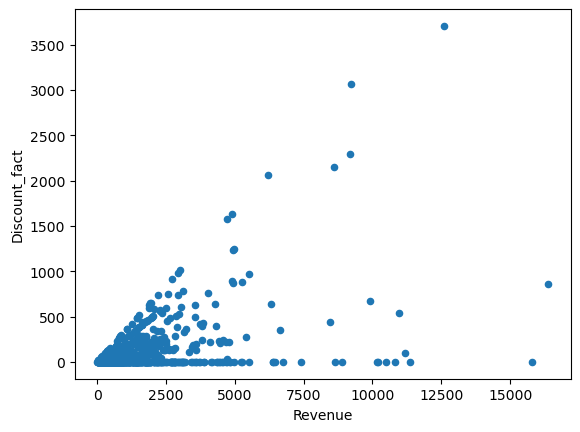

In [167]:
temp_df = df_od[df_od['Discount_fact'] > 0]
temp_df = df_od[['OrderID', 'Discount_fact', 'Revenue']].groupby('OrderID').sum().reset_index()
temp_df.plot(kind='scatter', x='Revenue', y='Discount_fact');

In [195]:
# Посчитайте отдельно по 1997 и по 1998 году чистую выручку в разрезе недель. 
# Запишите результаты в новые датафреймы. 
# Далее объедините их в общий датафрейм, в котором будет 3 столбца: 
# номер недели, чистая выручка 1997 год, чистая выручка 1998 год. 
# Постройте столбчатую диаграмму и выберите номера недель, на которых выручка в 1997 году была выше чем в 1998.

# Примечание: Объедините датафреймы с помощью типа соединения inner, 
# чтобы в итоговый датафрейм попали только недели, по которым есть заказы и в 1997 и в 1998 году.

display(df_o.head(1), df_od.head(1))

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight,Month_Year
0,10248,VINET,5,1996-07-04,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38,07-1996


,OrderID,ProductID,UnitPrice,Quantity,Discount,Discount_fact,Revenue
0,10248,11,14.0,12,0.0,0.0,168.0


In [198]:
temp_df = pd.merge(df_o, df_od, on='OrderID')[['OrderDate', 'Revenue']]
temp_df['week'] = temp_df['OrderDate'].dt.isocalendar().week
temp_df['OrderDate'] = temp_df['OrderDate'].dt.year
temp_df_97 = temp_df[temp_df['OrderDate'] == 1997].drop('OrderDate', axis=1).rename(columns={'Revenue': 'Revenue_1997'})
temp_df_98 = temp_df[temp_df['OrderDate'] == 1998].drop('OrderDate', axis=1).rename(columns={'Revenue': 'Revenue_1998'})
temp_df.shape

(2155, 3)

In [199]:
temp_df_97 = temp_df_97.groupby('week').agg({'Revenue_1997': 'sum'})
temp_df_98 = temp_df_98.groupby('week').agg({'Revenue_1998': 'sum'})

,Revenue_1997,Revenue_1998
week,,
1,24765.4375,4282.800
17,27895.1500,15460.625


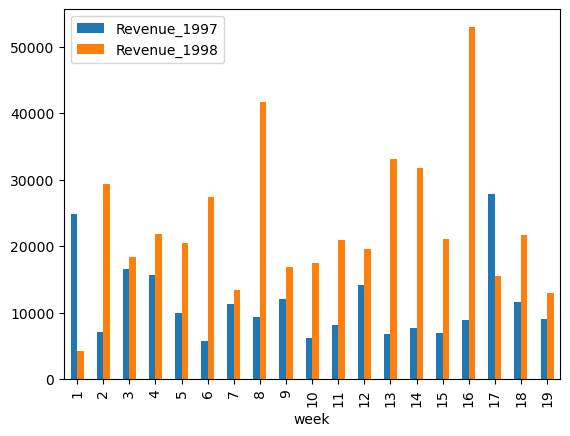

In [203]:
temp_df = pd.merge(temp_df_97, temp_df_98, on='week')
temp_df.plot(kind='bar')
temp_df[temp_df['Revenue_1997'] > temp_df['Revenue_1998']]

In [204]:
# Для каждого клиента CustomerID посчитайте количество совершенных заказов.
# Затем проанализируйте какое количество заказов совершают клиенты, построив box plot. 
# Выберите получившийся box plot из вариантов ниже.

df_o.head()

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,Freight,Month_Year
0,10248,VINET,5,1996-07-04,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,32.38,07-1996
1,10249,TOMSP,6,1996-07-05,1996-08-16 00:00:00.000,1996-07-10 00:00:00.000,11.61,07-1996
2,10250,HANAR,4,1996-07-08,1996-08-05 00:00:00.000,1996-07-12 00:00:00.000,65.83,07-1996
3,10251,VICTE,3,1996-07-08,1996-08-05 00:00:00.000,1996-07-15 00:00:00.000,41.34,07-1996
4,10252,SUPRD,4,1996-07-09,1996-08-06 00:00:00.000,1996-07-11 00:00:00.000,51.30,07-1996


In [211]:
temp_df = df_o[['CustomerID', 'OrderID']].groupby('CustomerID').count().reset_index().rename(columns={'OrderID': 'Count_orders'})
temp_df

,CustomerID,Count_orders
0,ALFKI,6
1,ANATR,4
2,ANTON,7
3,AROUT,13
4,BERGS,18
...,...,...
84,WARTH,15
85,WELLI,9
86,WHITC,14
87,WILMK,7


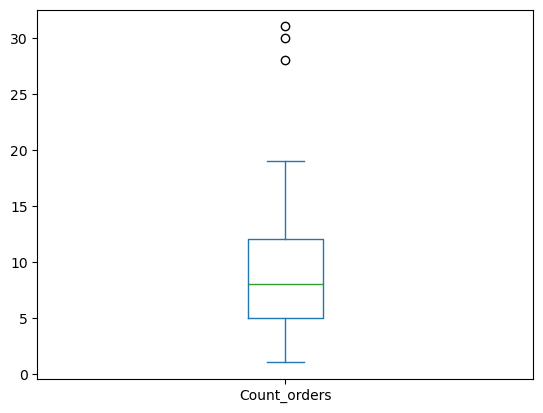

In [212]:
temp_df.plot(kind='box');

In [218]:
def grouping_by_profession(Title):
    if Title.count('Sales') > 0:
        return 'Sales'
    elif Title.count('Marketing') > 0:
        return 'Marketing'
    else:
        return 'Other'
    
temp_df = df_c['ContactTitle'].apply(grouping_by_profession).to_frame()
temp_df.value_counts()

ContactTitle
Sales           43
Other           29
Marketing       19
Name: count, dtype: int64